In [1]:
#importing packages
import numpy as np    #importing numpy for array operations
import pandas as pd   #importing pandas for data preprocessing
import seaborn as sb  #importing seaborn for data visualization
import matplotlib.pyplot as plt  #importing matplotlib for data visualization
import sklearn   #importing sklearn for model building
from pandas import Series, DataFrame  #importing Series and Dataframe for handling dataframes in data preprocessing
from pylab import rcParams   #importing rcParams for handling default matplotlib values.
from sklearn import preprocessing  #importing preprocessing for data preprocessing
from sklearn.model_selection import train_test_split  #importing train_test_split to get train and test data set
from sklearn import metrics   #importing metrix for calculating accuracy of the model
from sklearn.metrics import classification_report   #importing classification_report for showing final predicted result

In [2]:
#url for titanic dataset
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

#loading data into titanic dataframe
titanic = pd.read_csv(url)

In [3]:
#showing top 5 records
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#showing columns of titanic dataframe
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#choosing only columns that are necessary for survival prediction of a passanger 
titanic = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]

In [6]:
#showing top 5 records after removing unnecessary features from dataframe 
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [7]:
#labeling the sex columns
sex = pd.get_dummies(titanic['Sex'],drop_first=True)

In [8]:
#droping the 'sex' column from dataframe
titanic.drop('Sex',axis=1,inplace=True)

In [9]:
#merging original dataframe with labeled encoded 'sex' column
titanic = pd.concat([titanic,sex],axis=1)

In [10]:
#shwoing size of the dataframe
titanic.shape

(891, 7)

In [11]:
#droping records with nan values
titanic.dropna(inplace=True)

In [12]:
#showing size of dataframe after removing nan values
titanic.shape

(714, 7)

C:\Users\Vibhor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Vibhor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Vibhor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Vibhor\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


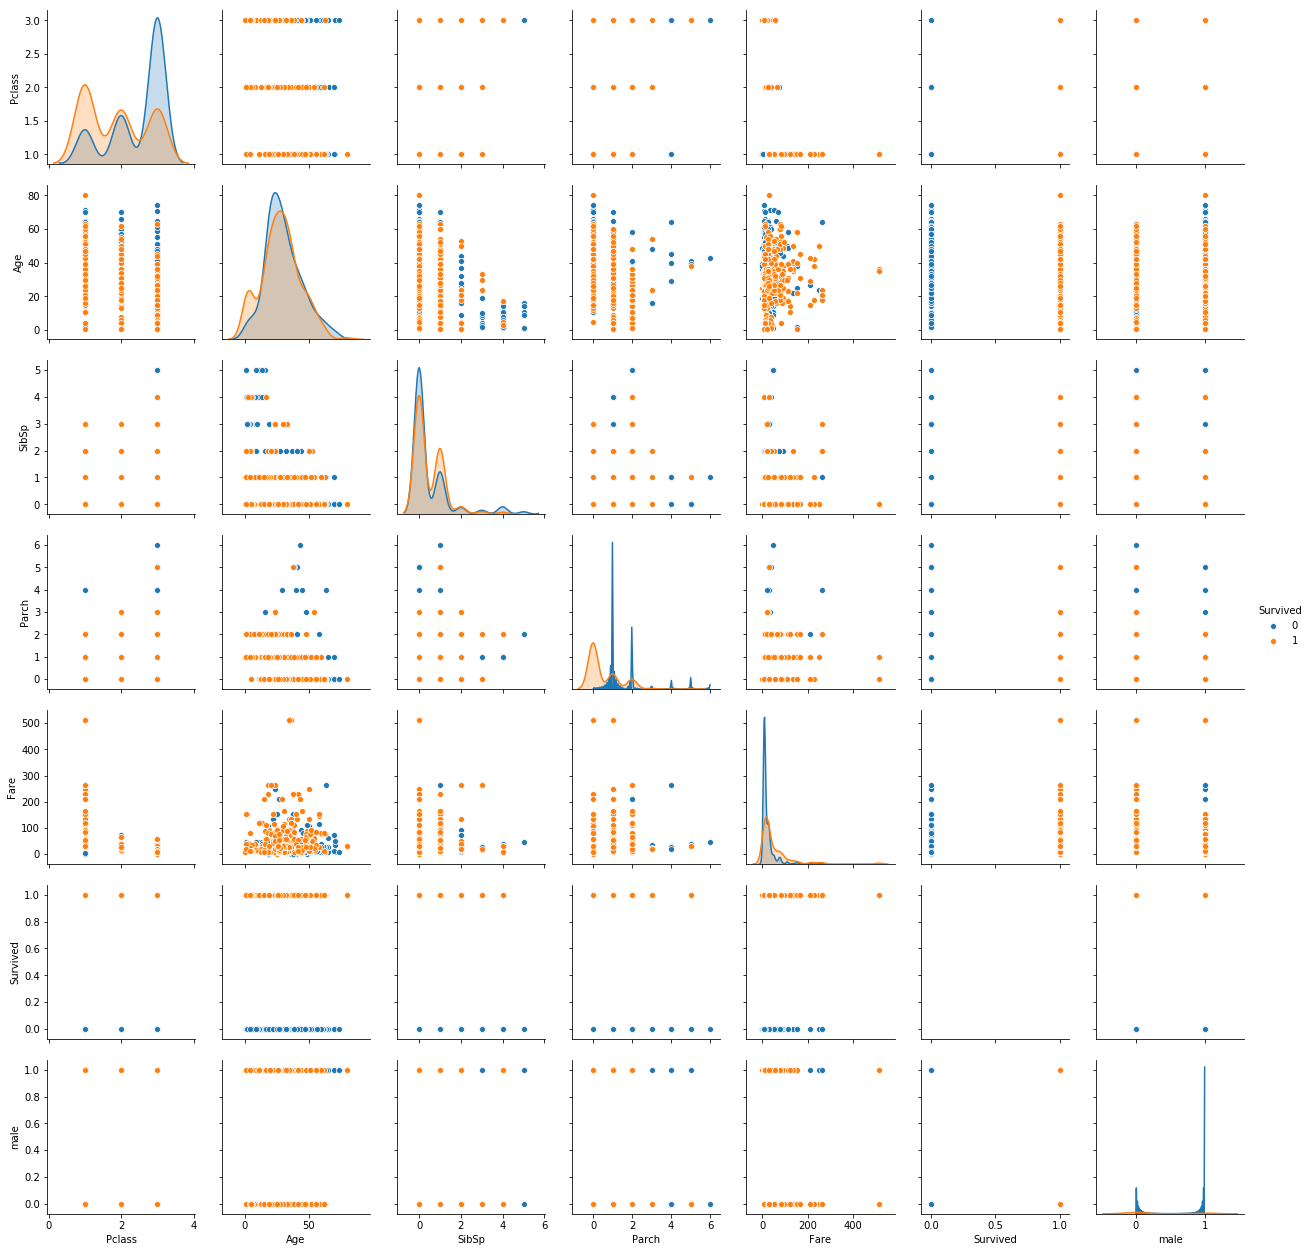

In [13]:
#plotting graph between features 
sb.pairplot(titanic,hue='Survived')

In [14]:
#differentiating independent and dependent features in 'X' and 'y'
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [15]:
#spliting the dataframe in training and test set
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [16]:
#importing DecisionTreeClassifier for fitting model in decision tree
from sklearn.tree import DecisionTreeClassifier

In [17]:
#creating instance of DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')

In [18]:
#fitting the model in decision tree
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
#predicting the output and storing in 'prediction' from model
predictions = dtree.predict(X_test)

In [20]:
#importing these packages for predicting accuracy of the model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [21]:
#fitting predicted values and test output values in confusion matrix
conf_matrix = confusion_matrix(y_test,predictions)

#getting accuracy of the model from accuracy_score
accuracy = accuracy_score(y_test,predictions)

In [22]:
#showing confusion matrix for the model and accuracy of the model
conf_matrix,accuracy

(array([[93, 32],
        [21, 69]], dtype=int64), 0.7534883720930232)

In [28]:
print("Accuracy of the model is : "+ str(accuracy))

Accuracy of the model is : 0.7534883720930232


In [29]:
#printing the classification report of the model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.82      0.74      0.78       125
          1       0.68      0.77      0.72        90

avg / total       0.76      0.75      0.75       215



In [24]:
#printing confusion matrix
print(conf_matrix)

[[93 32]
 [21 69]]


In [25]:
#Importing packages to show the decision tree build for the model 
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

#getting columns of dataframe in arranged manner for ease
col_order = ['Survived']+titanic.iloc[:,0:5].columns.values.tolist()+titanic.iloc[:,6:].columns.values.tolist()
col_order

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male']

In [26]:
#getting all the features which plays role in predicting output feature
features = list(col_order[1:])

#showing features output
features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male']

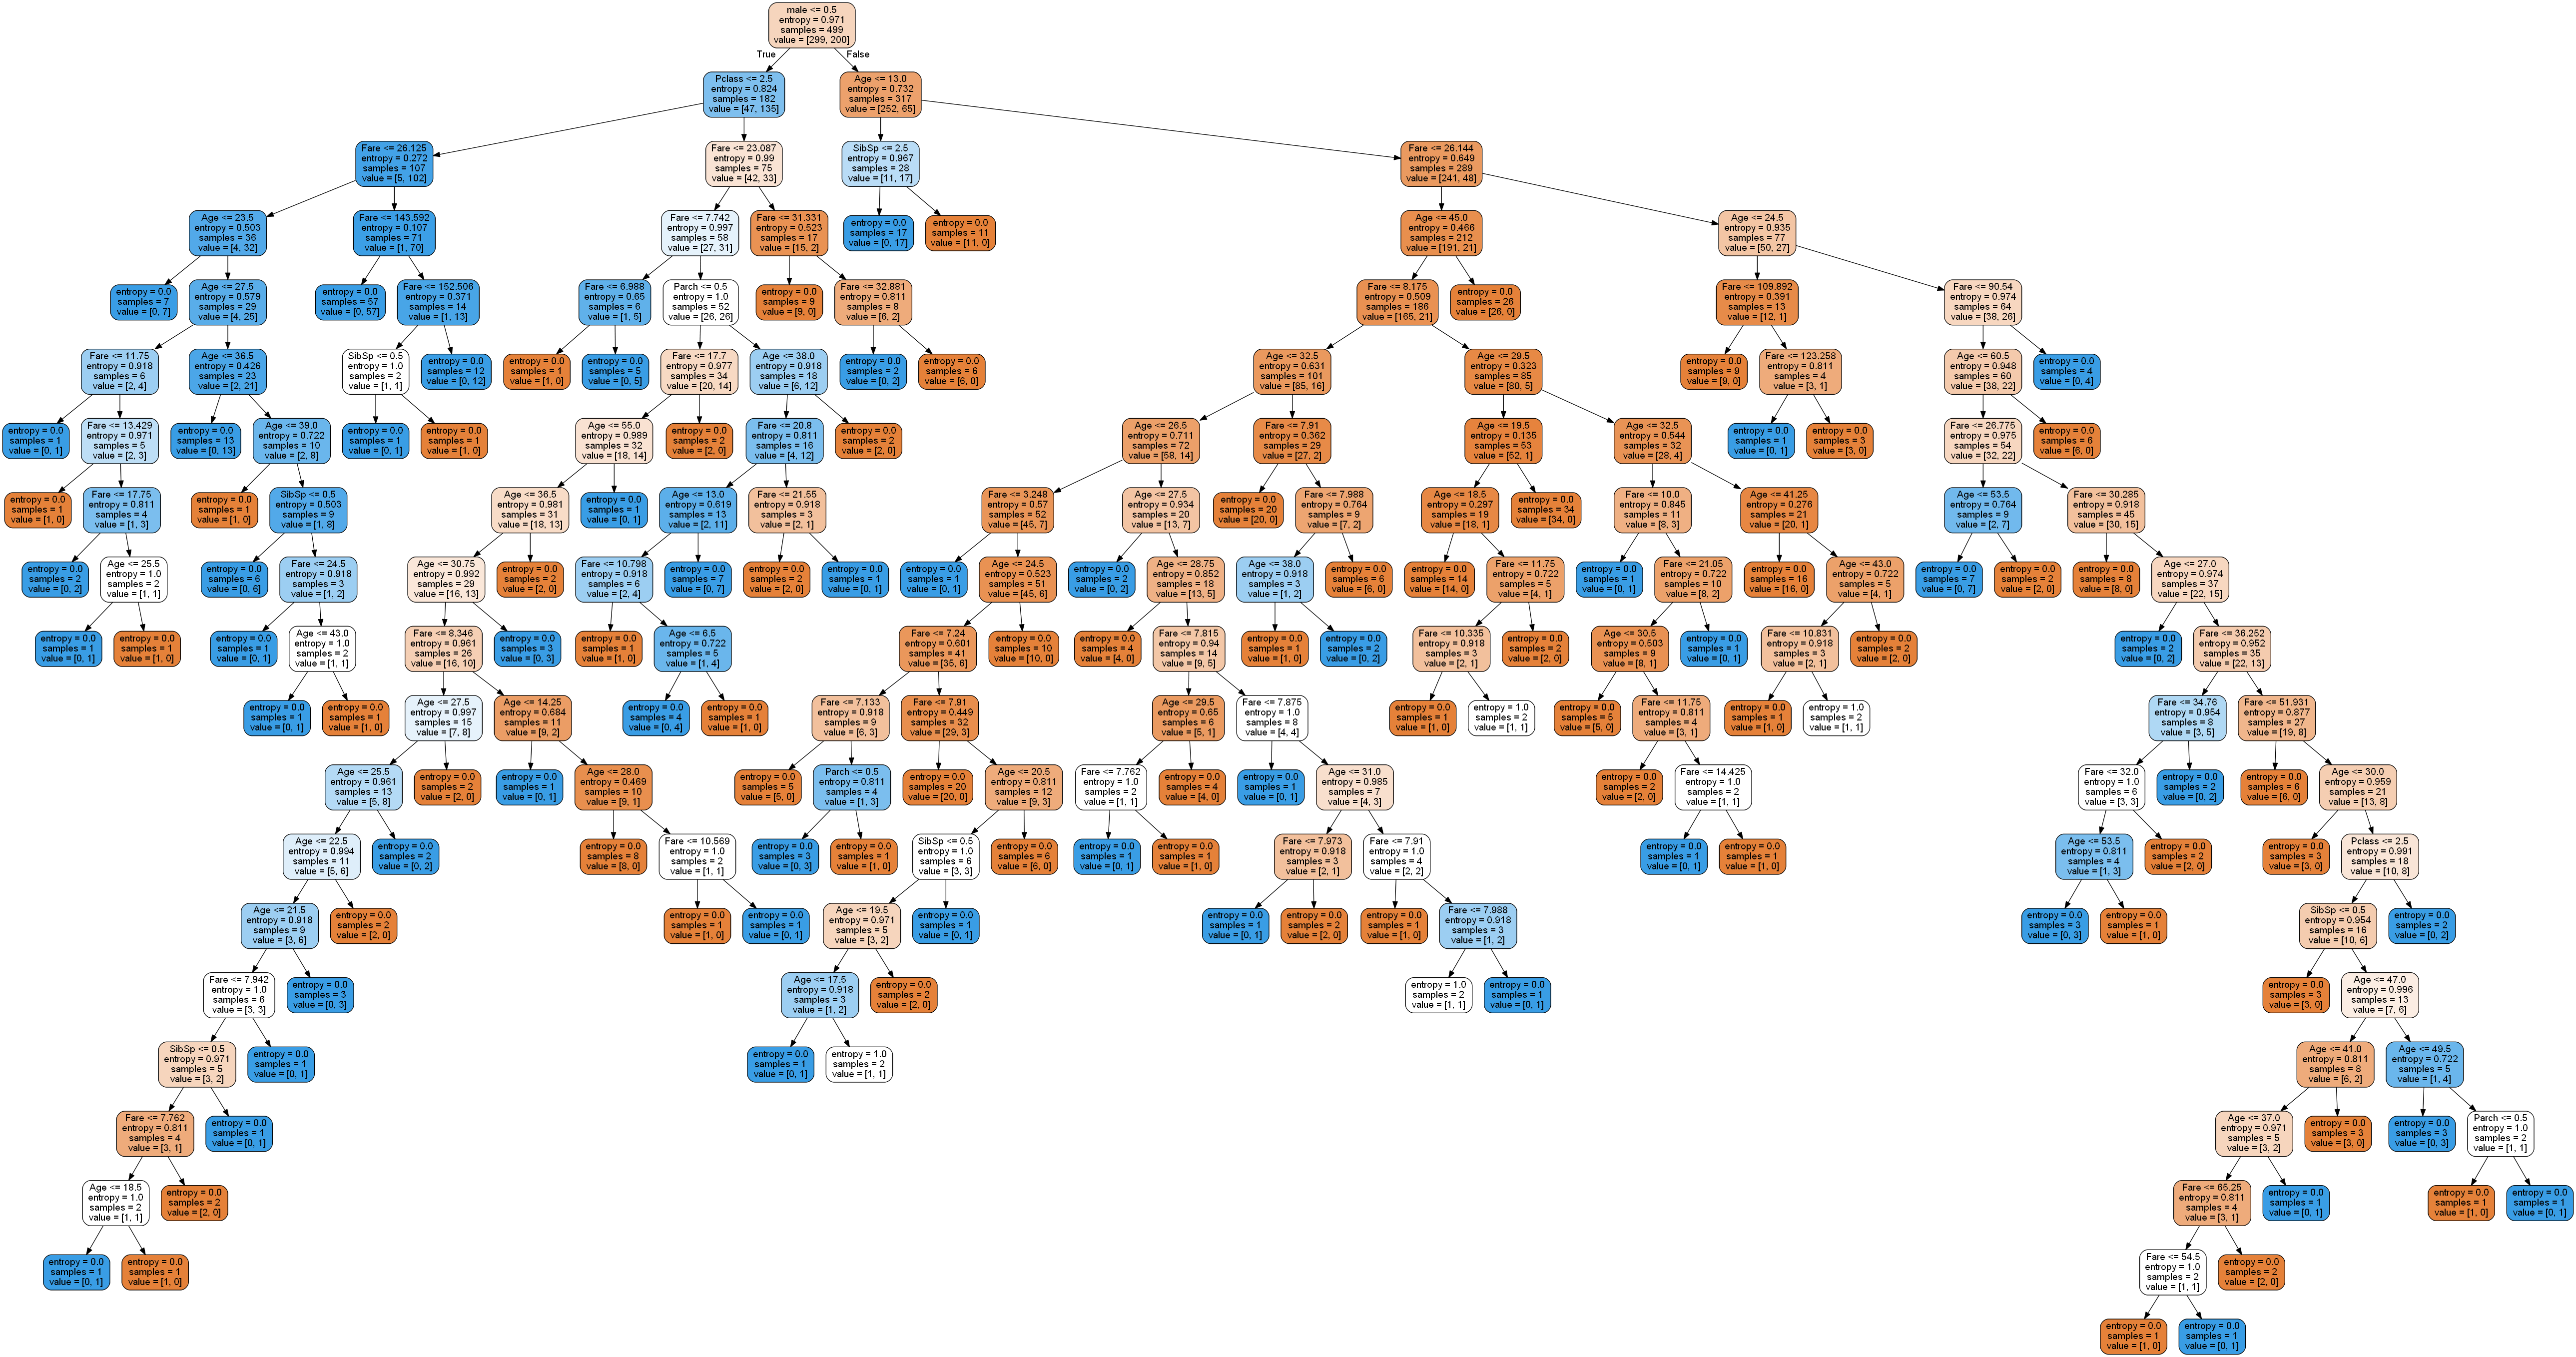

In [27]:
#initializing instance of StringIO
dot_data = StringIO()

#buliding tree for the model
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

#creating graph
graph = pydot.graph_from_dot_data(dot_data.getvalue())

#converting into Image for showing 
Image(graph[0].create_png())